In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

**TASK 1 : Implementation of ANN from Scratch**

In [4]:
data = pd.read_csv("Churn_Modelling - Churn_Modelling.csv")
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# Part 1 - Data Preprocessing

In [7]:
# Encoding categorical data
# Label Encoding the "Gender" column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# One Hot Encoding the "Geography" column
# One Hot Encoding the "Geography" column
encoder = OneHotEncoder(sparse=False)
data['Geography'] = encoder.fit_transform(data['Geography'].values.reshape(-1, 1))


data.head()

c:\Users\Nimra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619        1.0       0   42   
1          2    15647311      Hill          608        0.0       0   41   
2          3    15619304      Onio          502        1.0       0   42   
3          4    15701354      Boni          699        1.0       0   39   
4          5    15737888  Mitchell          850        0.0       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
# Splitting the dataset into the Training set and Test set

Y = data['Exited']
X = data.drop(['Exited'], axis = 1)
X = X.drop(['Surname'] , axis = 1)
X = X.drop(['RowNumber'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Part 2 - Building the ANN

In [10]:
input_dim = X_train.shape[1]
hidden_dim_1 = 4
hidden_dim_2 = 4
output_dim = 1

weights_input_hidden1 = np.random.rand(input_dim, hidden_dim_1)
bias_hidden1 = np.random.rand(1, hidden_dim_1)
weights_hidden1_hidden2 = np.random.rand(hidden_dim_1, hidden_dim_2)
bias_hidden2 = np.random.rand(1, hidden_dim_2)
weights_hidden2_output = np.random.rand(hidden_dim_2, output_dim)
bias_output = np.random.rand(1, output_dim)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

hidden_input1 = np.dot(X_train, weights_input_hidden1) + bias_hidden1
hidden_output1 = sigmoid(hidden_input1)
hidden_input2 = np.dot(hidden_output1, weights_hidden1_hidden2) + bias_hidden2
hidden_output2 = sigmoid(hidden_input2)
output_layer_input = np.dot(hidden_output2, weights_hidden2_output) + bias_output
output_layer_output = sigmoid(output_layer_input)

hidden_input1_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
hidden_output1_test = sigmoid(hidden_input1_test)
hidden_input2_test = np.dot(hidden_output1_test, weights_hidden1_hidden2) + bias_hidden2
hidden_output2_test = sigmoid(hidden_input2_test)
output_layer_input_test = np.dot(hidden_output2_test, weights_hidden2_output) + bias_output
output_layer_output_test = sigmoid(output_layer_input_test)


predictions = (output_layer_output_test > 0.5).astype(int)
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()
accuracy = (predictions == y_test_flat).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 19.65%


In [ ]:
single_observation = {'Geography' : 'France' , 'Credit Score': 600, 'Gender': 'Male','Age': 40,'Tenure': 3,'Balance': 60000,'Number of Products': 2,'Has Credit Card': 'Yes','Is Active Member': 'Yes','Estimated Salary': 50000}
predictions = (single_observation > 0.5).astype(int)

In [12]:
cm = confusion_matrix(y_test_flat, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1-score
classification_report(y_test_flat, predictions)

Confusion Matrix:
[[   0 1607]
 [   0  393]]


c:\Users\Nimra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nimra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1607\n           1       0.20      1.00      0.33       393\n\n    accuracy                           0.20      2000\n   macro avg       0.10      0.50      0.16      2000\nweighted avg       0.04      0.20      0.06      2000\n'

**TASK 2 : Implementation of CNN from Scratch**

In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

RGB Images


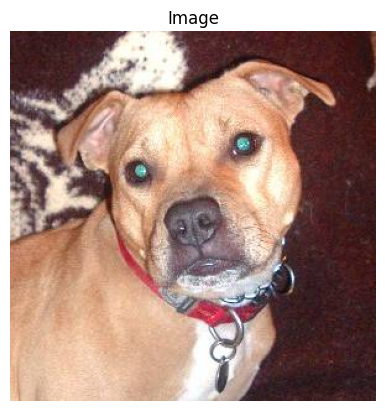

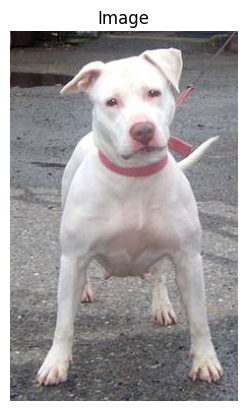

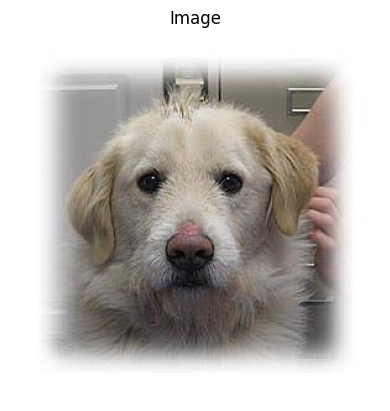

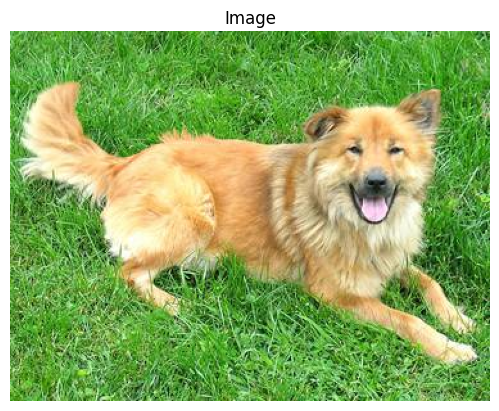

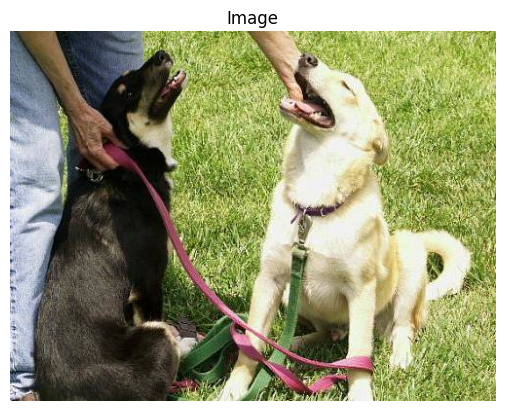

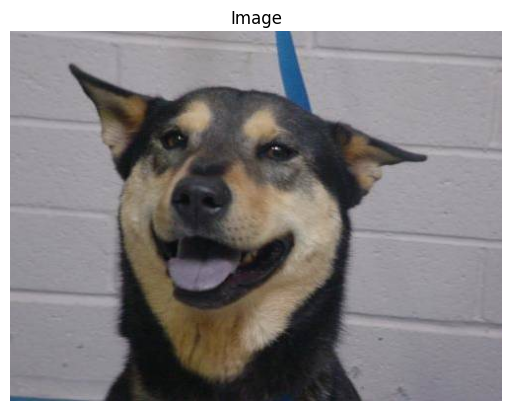

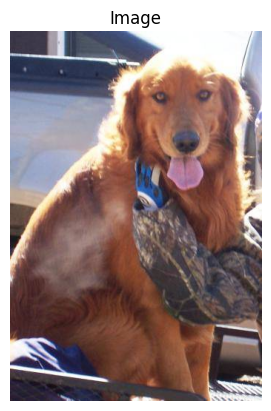

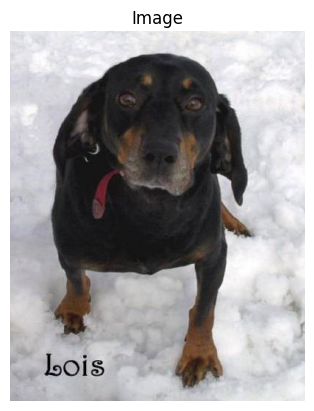

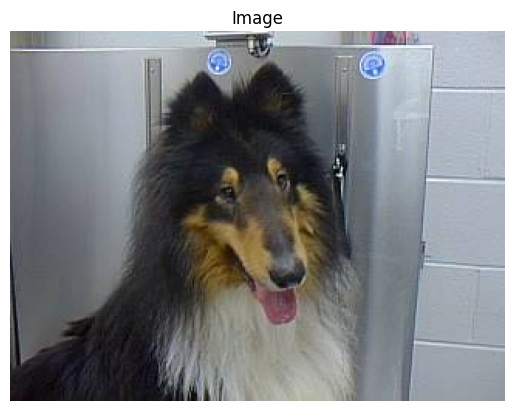

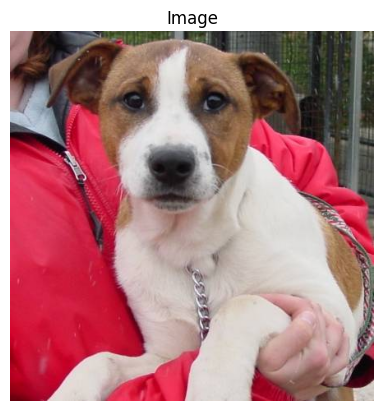

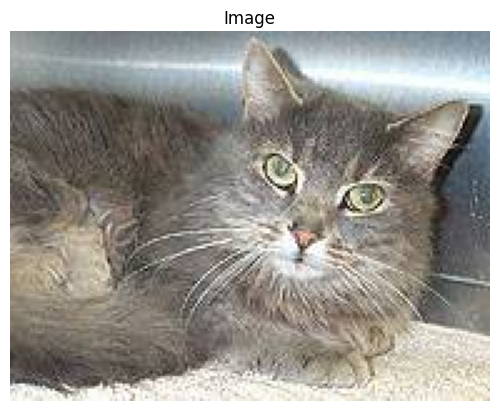

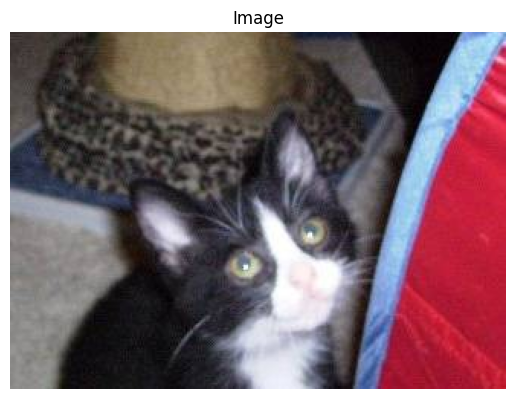

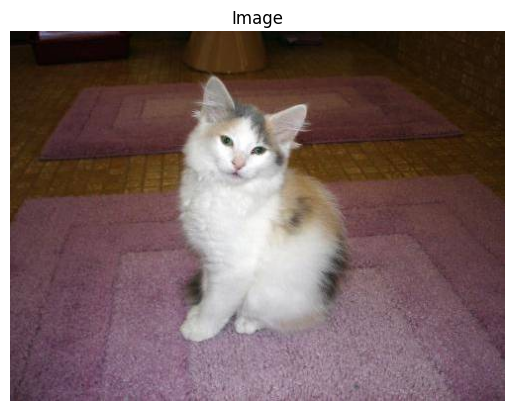

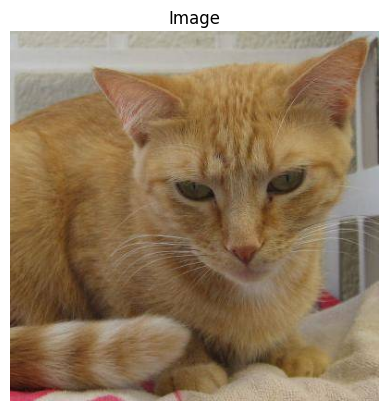

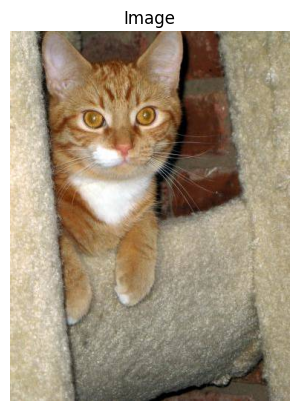

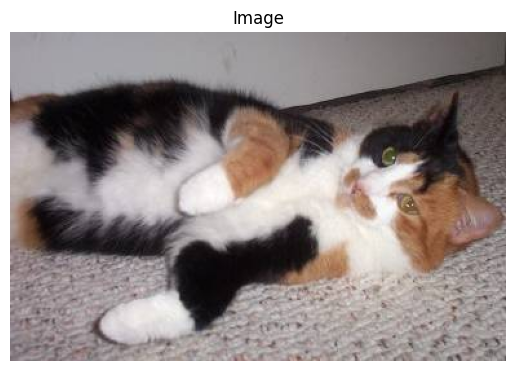

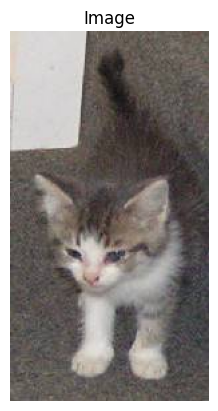

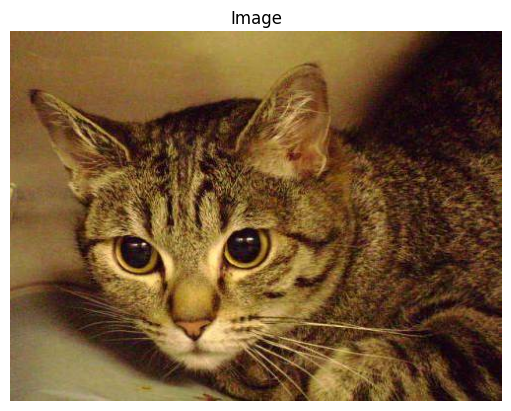

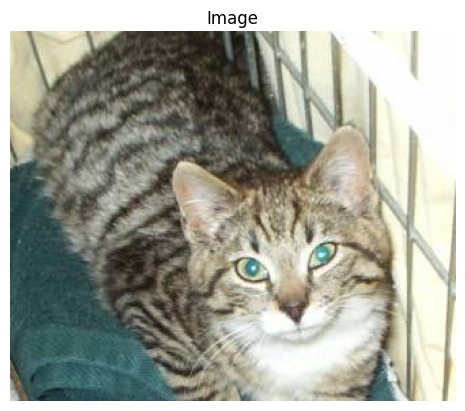

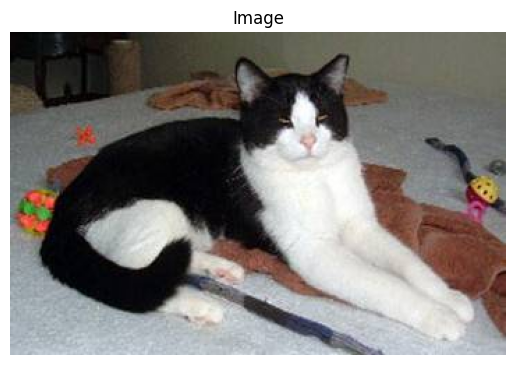

In [11]:
dataset = ["1.jpg" , "2.jpg" , "3.jpg" , "4.jpg" , "5.jpg" , "6.jpg" , "7.jpg" , "8.jpg" , "9.jpg" , "10.jpg" , "11.jpg" , "12.jpg" , "13.jpg" , "14.jpg" , "15.jpg" , "16.jpg" , "17.jpg" , "18.jpg" , "19.jpg" , "20.jpg"]

img = []
for image in dataset:
  img.append(cv2.imread(image,1))

# Displaying the images

print("RGB Images")
for i in range(0, len(img)):
    plt.imshow(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.title("Image")
    plt.axis("off")  # Turn off axis labels
    plt.show()

Image Pre-Processing

In [12]:
# Split the dataset into train and test sets
train_images, test_images = train_test_split(dataset, test_size=0.2, random_state=42)

# For Train Images
gray_images = []

for image in train_images:
    img = cv2.imread(image)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray_images.append(gray_img)

# Based on Mean and Standard Deviation
noise = []
type = []

noise_threshold = 30
gaussian_threshold = 50

for img in gray_images:
    std_deviation = np.std(img)

    if std_deviation > noise_threshold:
        noise.append(img)
        if std_deviation < gaussian_threshold:
            type.append("Gaussian")
        else:
            type.append("Salt and Pepper")


for i, img in enumerate(noise):
    print("Image : " , i+1)
    print("Noise Type : ", type[i])
    print("\n")
noise_less_Gaussian = []
noise_less_Salt = []

for img in gray_images:
    std_deviation = np.std(img)

    if std_deviation > noise_threshold:
        noise.append(img)
        if std_deviation < gaussian_threshold:
            image = cv2.GaussianBlur(img, (5,5) , 0)      #to remove Gassian Noise
            noise_less_Gaussian.append(image)

        else:
            image = cv2.medianBlur(img , 3)   #to remove salt and pepper noise
            noise_less_Salt.append(image)

Image :  1
Noise Type :  Salt and Pepper


Image :  2
Noise Type :  Gaussian


Image :  3
Noise Type :  Salt and Pepper


Image :  4
Noise Type :  Gaussian


Image :  5
Noise Type :  Salt and Pepper


Image :  6
Noise Type :  Salt and Pepper


Image :  7
Noise Type :  Gaussian


Image :  8
Noise Type :  Salt and Pepper


Image :  9
Noise Type :  Salt and Pepper


Image :  10
Noise Type :  Salt and Pepper


Image :  11
Noise Type :  Salt and Pepper


Image :  12
Noise Type :  Salt and Pepper


Image :  13
Noise Type :  Salt and Pepper


Image :  14
Noise Type :  Salt and Pepper


Image :  15
Noise Type :  Gaussian


Image :  16
Noise Type :  Salt and Pepper




In [14]:
# For Test Images
gray_images = []

for image in test_images:
    img = cv2.imread(image)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray_images.append(gray_img)

# Based on Mean and Standard Deviation
noise = []
type = []

noise_threshold = 30
gaussian_threshold = 50

for img in gray_images:
    std_deviation = np.std(img)

    if std_deviation > noise_threshold:
        noise.append(img)
        if std_deviation < gaussian_threshold:
            type.append("Gaussian")
        else:
            type.append("Salt and Pepper")


for i, img in enumerate(noise):
    print("Image : " , i+1)
    print("Noise Type : ", type[i])
    print("\n")
noise_less_Gaussian = []
noise_less_Salt = []

for img in gray_images:
    std_deviation = np.std(img)

    if std_deviation > noise_threshold:
        noise.append(img)
        if std_deviation < gaussian_threshold:
            image = cv2.GaussianBlur(img, (5,5) , 0)      #to remove Gassian Noise
            noise_less_Gaussian.append(image)

        else:
            image = cv2.medianBlur(img , 3)   #to remove salt and pepper noise
            noise_less_Salt.append(image)

Image :  1
Noise Type :  Salt and Pepper


Image :  2
Noise Type :  Gaussian


Image :  3
Noise Type :  Salt and Pepper


Image :  4
Noise Type :  Salt and Pepper




Building CNN

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(train_images, validation_data=test_images, epochs=25)

test_loss, test_acc = cnn.evaluate(test_images)
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [ ]:
# Part 4 - Making a single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 prediction = 'dog'
else:
 prediction = 'cat'